# Stock Price Prediction using LSTM

## Part 1 - Data Preprocessing

### Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [ ]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

### Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

#feature_range: tuple (min, max), default=(0, 1)
#               Desired range of transformed data.
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [ ]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [ ]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [ ]:
# units: Number of neurons in an LSTM Layer.
# return_sequences: Boolean. Whether to return the last output in the output sequence, or the full sequence. Default: False.
# A 3D tensor with shape [batch, timesteps, feature].
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))

# dropout: Float between 0 and 1. Fraction of the units to drop for the linear transformation of the inputs. Default: 0.
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [ ]:
#Dense: Output Layer
regressor.add(Dense(units = 1))

### Compiling the RNN

In [ ]:
#optimizer: The algorithm to update the weights like GD
#loss: loss function used
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [ ]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 13s 131ms/step - loss: 0.0386
Epoch 2/100
38/38 [==============================] - 5s 131ms/step - loss: 0.0069
Epoch 3/100
38/38 [==============================] - 5s 133ms/step - loss: 0.0066
Epoch 4/100
38/38 [==============================] - 5s 132ms/step - loss: 0.0052
Epoch 5/100
38/38 [==============================] - 5s 134ms/step - loss: 0.0048
Epoch 6/100
38/38 [==============================] - 5s 131ms/step - loss: 0.0047
Epoch 7/100
38/38 [==============================] - 5s 133ms/step - loss: 0.0046
Epoch 8/100
38/38 [==============================] - 5s 131ms/step - loss: 0.0057
Epoch 9/100
38/38 [==============================] - 5s 130ms/step - loss: 0.0049
Epoch 10/100
38/38 [==============================] - 5s 132ms/step - loss: 0.0049
Epoch 11/100
38/38 [==============================] - 5s 132ms/step - loss: 0.0039
Epoch 12/100
38/38 [==============================] - 5s 132ms/step - loss: 0.0040
Epoch 13/100

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [ ]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

### Getting the predicted stock price of 2017

In [ ]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 4s 4s/step


### Visualising the results

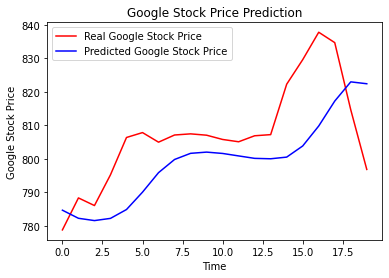

In [ ]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()